## **ML IA 2- Machine learning for healthcare**

### **Dataset**: Heart Disease dataset ( https://www.kaggle.com/johnsmith88/heart-disease-dataset )

### **Attribute Information** -

* **age** - age in years
* **sex** - (1 = male; 0 = female)
* **cp** - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* **trestbps** - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* **chol** - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* **fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* **restecg** - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
* **thalach** - maximum heart rate achieved
* **exang** - exercise induced angina (1 = yes; 0 = no)
* **oldpeak** - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* **ca** - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* **thal** - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* **target** - have disease or not (1=yes, 0=no) (= the predicted attribute)


## **Importing required libraries**

In [73]:
# Handling dataset , performing operations
import numpy as np
import pandas as pd
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff

# Preprocessing , Metrics
from sklearn.preprocessing import StandardScaler as ss
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

# Data modelling
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## **Importing - loading dataset**

In [2]:
df = pd.read_csv('heart.csv') # importing dataset
df.head() # displaying first five records

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **EDA ( Exploratory Data Analysis )**

In [3]:
df.shape # in the form of (rows,cols)

(1025, 14)

In [4]:
df.dtypes # display data types

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.nunique() # displaying unique value of each column

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
df.describe() # to display different statistical measures of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info() # to display full summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
# checking for NaN values if any
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [9]:
# finding out columns with null values
df.columns[df.isnull().any()].tolist()

[]

In [10]:
# Checking if the datset is imbalanced 
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
# Shuffling dataset ( to remove any biases in the dataset if any )
df = df.sample(frac=1)

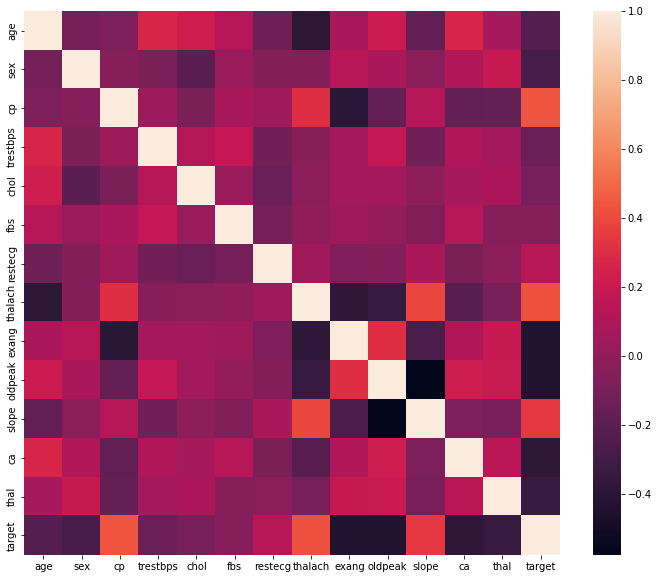

In [12]:
# plotting the correlation heatmap 
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

Taking a look at the correlation matrix above, we can comprehend that few features have negative correlation with the target value while some have positive.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0249b8c90>,
      dtype=object)

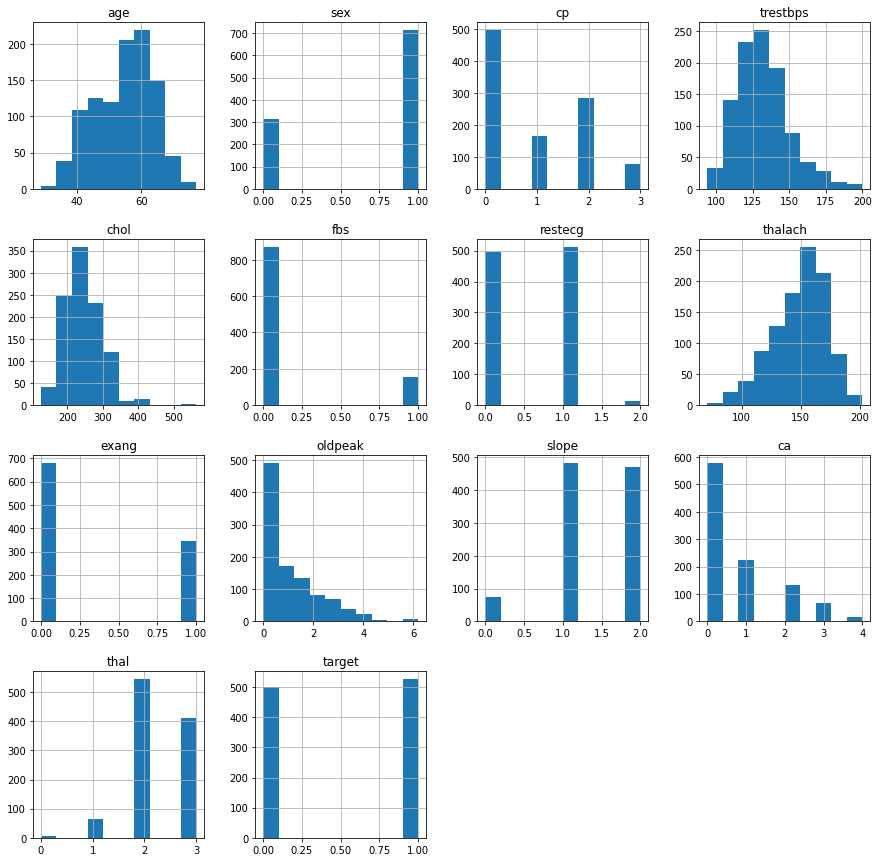

In [13]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax)

Taking a look at the histograms above, we can comprehend that each feature has a different range of distribution. Thus, using scaling before our predictions would be of great use.

([<matplotlib.patches.Wedge at 0x7fa023dda950>,
 [Text(-0.06825262763640201, 1.6485877528420279, 'Sick'),
  Text(0.06825262763640144, -1.6485877528420279, 'Healthy')],
 [Text(-0.037228705983492004, 0.8992296833683786, '51.3%'),
  Text(0.03722870598349169, -0.8992296833683786, '48.7%')])

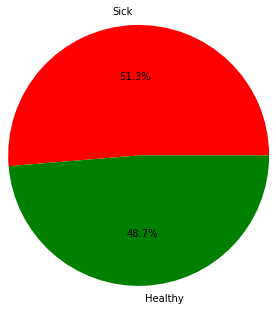

In [14]:
plt.pie(df['target'].value_counts(), labels=['Sick','Healthy'], colors=['red','green'], autopct='%1.1f%%', radius=1.5)

We can see that half of the people in this study had heart disease.

([<matplotlib.patches.Wedge at 0x7fa02448e450>,
 [Text(-0.9513428564398835, 1.3481271340273526, 'Male'),
  Text(0.9513428564398827, -1.348127134027353, 'Female')],
 [Text(-0.5189142853308454, 0.7353420731058286, '69.6%'),
  Text(0.518914285330845, -0.7353420731058289, '30.4%')])

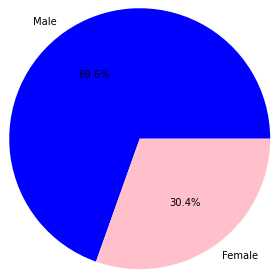

In [15]:
plt.pie(df['sex'].value_counts(), labels=['Male','Female'], colors=['blue','pink'], autopct='%1.1f%%', radius=1.5)

We can see that 30% of people were female and 70% were male.

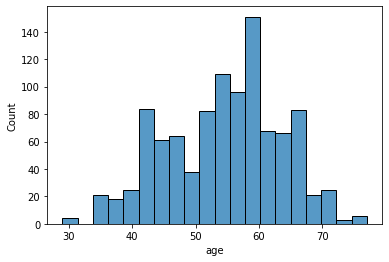

In [16]:
sns.histplot(df['age'], bins= 20)

We can see that most of the people in this study had age 50-60.

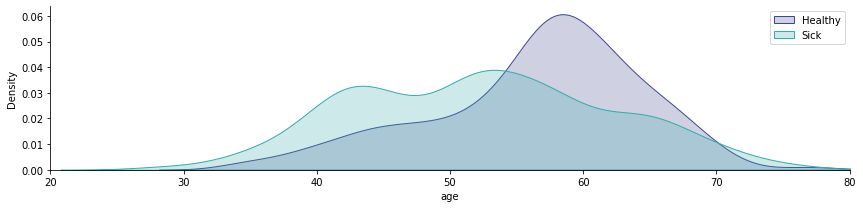

In [17]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='mako')
fig.map(sns.kdeplot,'age',shade= True)
fig.set(xlim=(20,80))
plt.legend(labels=['Healthy' , 'Sick'])

We can see that most of the people show their heart disease between age 40-60. Also, we see a peak of healthy people at 60. Let's see if age is a factor in heart disease:

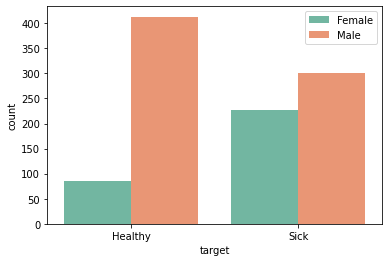

In [18]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex', palette='Set2')
fig.set_xticklabels(labels=['Healthy', 'Sick'])
plt.legend(['Female', 'Male'])

We can see that there are more man in this study, so both healthy and sick male are more than females.

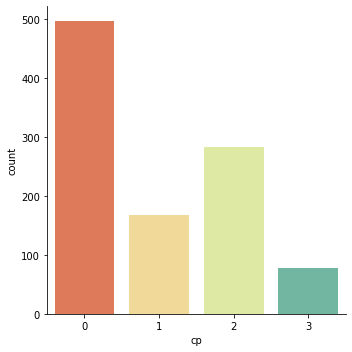

In [19]:
# chest pain type
sns.catplot(x='cp', data=df, kind="count", palette='Spectral')

We can see the chest pain type 0 is more common between people.

[Text(0, 0, 'pain type 0'),
 Text(0, 0, 'pain type 1'),
 Text(0, 0, 'pain type 2'),
 Text(0, 0, 'pain type 3')]

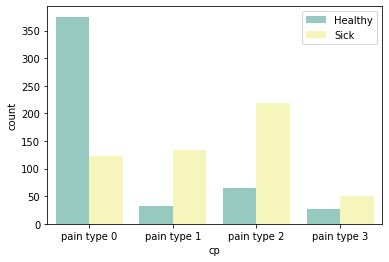

In [20]:
fig = sns.countplot(x = 'cp', data = df, hue = 'target', palette='Set3')
plt.legend(['Healthy', 'Sick'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'])

It seems that people with chest pain type 0 are less likely to have a serious problem. Chest pain type 2 seems more serious though.

[Text(0.5, 0, 'resting blood pressure')]

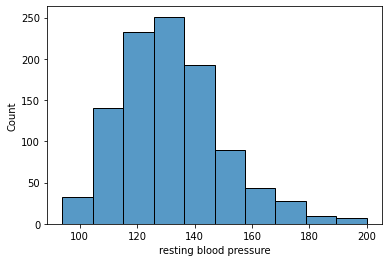

In [21]:
fig = sns.histplot(df['trestbps'], bins= 10)
fig.set(xlabel = 'resting blood pressure')

The blood pressure of the poeple in this study is between 120-130. Let's see if this is related to their health condition:

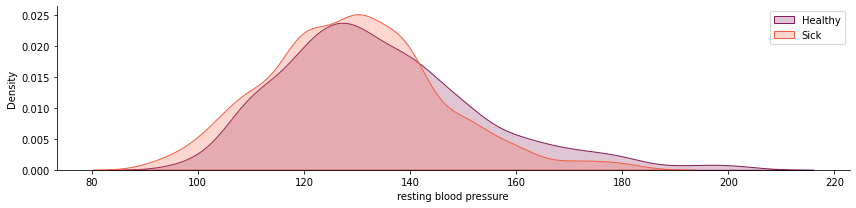

In [22]:
fig = sns.FacetGrid(df, hue="target",aspect=4, palette='rocket')
fig.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Healthy' , 'Sick'])
fig.set(xlabel = 'resting blood pressure')

It seems that people with heart problems generally had slighly lower blood pressure than normal people.

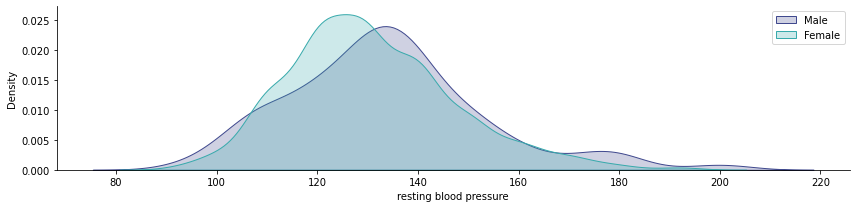

In [23]:
fig = sns.FacetGrid(df, hue="sex",aspect=4, palette='mako')
fig.map(sns.kdeplot,'trestbps',shade= True)
plt.legend(labels=['Male' , 'Female'])
fig.set(xlabel = 'resting blood pressure')

Women have lower resting blood pressure comparing to men. For women is around 120 while for men is a little less than 140.

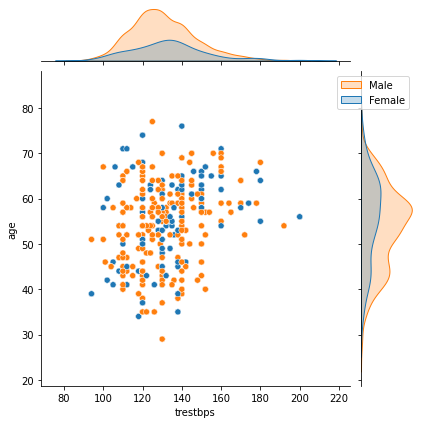

In [24]:
sns.jointplot(data=df, x='trestbps', y='age', hue='sex', kind='scatter', legend=False)
plt.legend(labels=['Male' , 'Female'])

In both women and men we can see that blood pressure increases with age.

[Text(0.5, 0, 'serum cholestrol')]

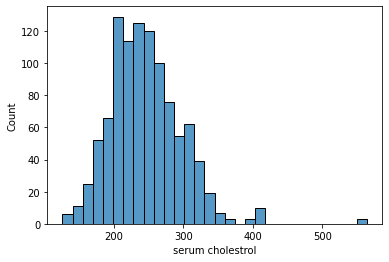

In [25]:
fig = sns.histplot(df['chol'], bins= 30)
fig.set(xlabel = 'serum cholestrol')

As expected, serum cholestrol is between 200-300 in this study.

In [26]:
# plotting the distribution of maximum heart rate in ones with heart disease and ones without.
ff.create_distplot([df[df.target==0].thalach,df[df.target==1].thalach],["Max. Heart rate of ones without heart disease","Max. Heart rate of ones with heart disease"])


In the above figure we can see the difference in the distribution of Maximum Heart Rate for the ones with Heart Disease, Their Heart seems to be working much harder during high intensity activities compared to resting rate.

## **Data pre-processing**

In [27]:
# Seperating the Independent variables and the target variable 
X=df.iloc[:,:-1]
y=df.target

In [28]:
# Splitting the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [29]:
# checking the shapes
print(X_train.shape,X_test.shape)

(717, 13) (308, 13)


In [30]:
# Standard Scaler
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
X_train

array([[-0.08688114,  0.65443629, -0.89780208, ...,  1.00986768,
        -0.73547509, -0.51138996],
       [-1.76746859,  0.65443629,  1.02089864, ...,  1.00986768,
        -0.73547509, -0.51138996],
       [ 0.36127552,  0.65443629,  1.02089864, ...,  1.00986768,
        -0.73547509, -0.51138996],
       ...,
       [ 1.14554966, -1.52803263,  1.02089864, ...,  1.00986768,
         0.21811558, -0.51138996],
       [ 1.48166715,  0.65443629,  1.02089864, ...,  1.00986768,
         0.21811558,  1.07591134],
       [ 0.24923635,  0.65443629, -0.89780208, ..., -0.61726743,
         0.21811558,  1.07591134]])

In [32]:
X_test

array([[-1.4313511 , -1.52803263,  1.02089864, ..., -0.61726743,
        -0.73547509, -0.51138996],
       [ 0.69739301,  0.65443629, -0.89780208, ..., -0.61726743,
         0.21811558, -0.51138996],
       [ 0.02515803,  0.65443629, -0.89780208, ..., -0.61726743,
         0.21811558,  1.07591134],
       ...,
       [ 0.47331468,  0.65443629, -0.89780208, ...,  1.00986768,
         0.21811558,  1.07591134],
       [-0.08688114,  0.65443629, -0.89780208, ..., -0.61726743,
         0.21811558, -0.51138996],
       [-0.87115528,  0.65443629, -0.89780208, ..., -0.61726743,
         0.21811558, -0.51138996]])

## **Model building**

Different ML models to be built: 

1. Support Vector Machine
2. Logistic Regression
3. Naive Bayes
4. Decision Tree
5. Random Forest Classifier
6. K-Nearest Neighbour
7. XG-Boost Classifier

(1) **SVM**

In [33]:
# training SVM classifier
SVM = SVC(kernel = 'rbf')
SVM.fit(X_train, y_train)

# Predicting the test set results
y_pred_SVM = SVM.predict(X_test)

print("SVM classifer results: \n")

accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print("Accuracy: %.2f%%" % (accuracy_SVM * 100.0))

precision_SVM = precision_score(y_test, y_pred_SVM, average=None)
print("Precision: %.2f%%" % (precision_SVM[1] * 100.0))

recall_SVM = recall_score(y_test, y_pred_SVM, average=None)
print("Recall: %.2f%%" % (recall_SVM[1] * 100.0))

f1score_SVM= f1_score(y_test, y_pred_SVM, average=None)
print("F1 Score: %.2f%%" % (f1score_SVM[1] * 100.0))

SVM classifer results: 

Accuracy: 92.86%
Precision: 90.75%
Recall: 96.32%
F1 Score: 93.45%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

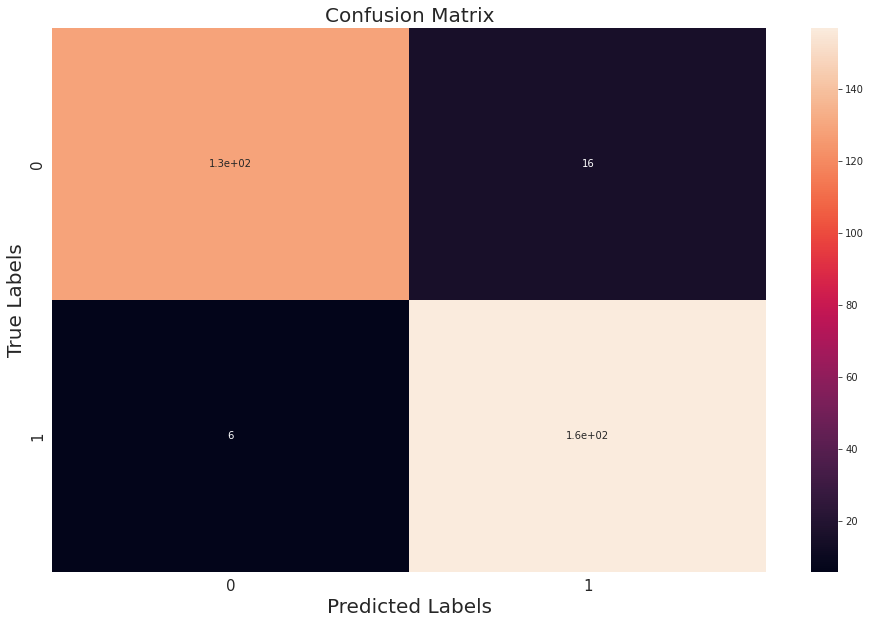

In [105]:
matrix = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

(2) **Logistic Regression**

In [34]:
# training Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)

# Predicting the test set results
y_pred_LR = LR.predict(X_test)

print("Logistic Regression results: \n")

accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Accuracy: %.2f%%" % (accuracy_LR * 100.0))

precision_LR = precision_score(y_test, y_pred_LR, average=None)
print("Precision: %.2f%%" % (precision_LR[1] * 100.0))

recall_LR = recall_score(y_test, y_pred_LR, average=None)
print("Recall: %.2f%%" % (recall_LR[1] * 100.0))

f1score_LR= f1_score(y_test, y_pred_LR, average=None)
print("F1 Score: %.2f%%" % (f1score_LR[1] * 100.0))

Logistic Regression results: 

Accuracy: 85.71%
Precision: 84.39%
Recall: 89.57%
F1 Score: 86.90%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

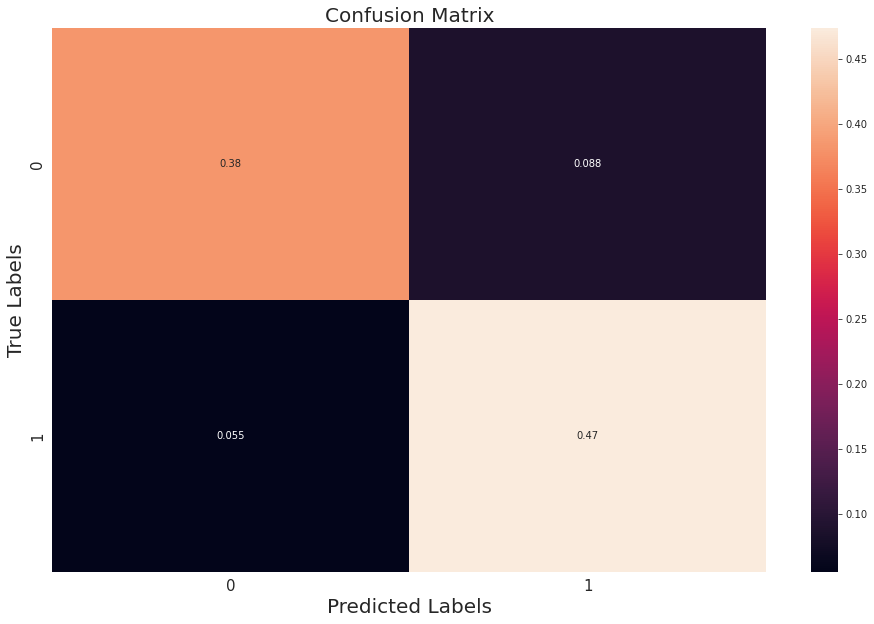

In [109]:
matrix = confusion_matrix(y_test, y_pred_LR,normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

(3) **Naive Bayes**

In [35]:
# training Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)

# Predicting the test set results
y_pred_NB = NB.predict(X_test)

print("Naive Bayes results: \n")

accuracy_NB = accuracy_score(y_test, y_pred_NB)
print("Accuracy: %.2f%%" % (accuracy_NB * 100.0))

precision_NB = precision_score(y_test, y_pred_NB, average=None)
print("Precision: %.2f%%" % (precision_NB[1] * 100.0))

recall_NB = recall_score(y_test, y_pred_NB, average=None)
print("Recall: %.2f%%" % (recall_NB[1] * 100.0))

f1score_NB= f1_score(y_test, y_pred_NB, average=None)
print("F1 Score: %.2f%%" % (f1score_NB[1] * 100.0))

Naive Bayes results: 

Accuracy: 81.17%
Precision: 78.69%
Recall: 88.34%
F1 Score: 83.24%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

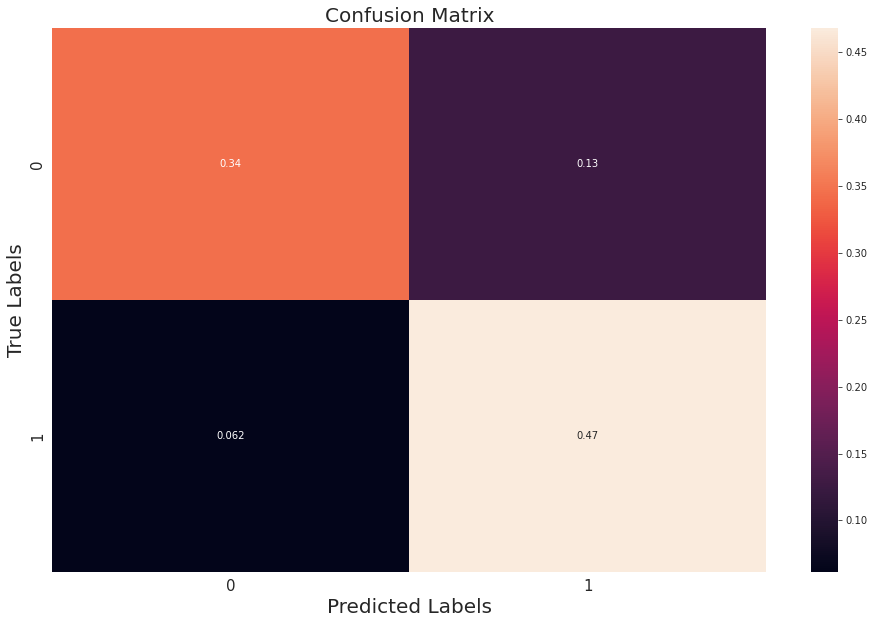

In [108]:
matrix = confusion_matrix(y_test, y_pred_NB,normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

(4) **Decision Tree**

In [36]:
# training Decision Tree
DT = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
DT.fit(X_train, y_train)

# Predicting the test set results
y_pred_DT = DT.predict(X_test)

print("Decision Tree results: \n")

accuracy_DT = accuracy_score(y_test, y_pred_DT)
print("Accuracy: %.2f%%" % (accuracy_DT * 100.0))

precision_DT = precision_score(y_test, y_pred_DT, average=None)
print("Precision: %.2f%%" % (precision_DT[1] * 100.0))

recall_DT = recall_score(y_test, y_pred_DT, average=None)
print("Recall: %.2f%%" % (recall_DT[1] * 100.0))

f1score_DT= f1_score(y_test, y_pred_DT, average=None)
print("F1 Score: %.2f%%" % (f1score_DT[1] * 100.0))

Decision Tree results: 

Accuracy: 89.61%
Precision: 95.80%
Recall: 84.05%
F1 Score: 89.54%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

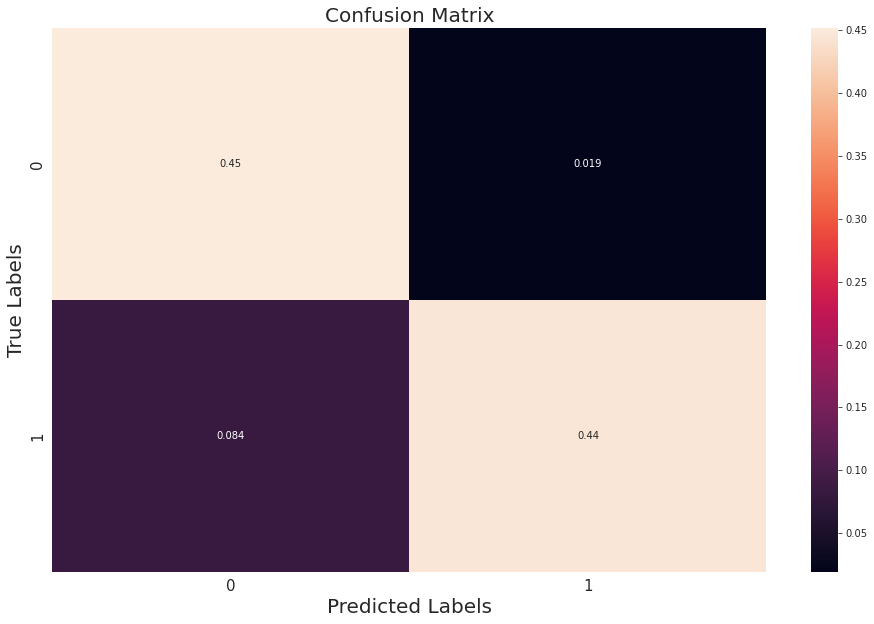

In [110]:
matrix = confusion_matrix(y_test, y_pred_DT,normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

(5) **Random Forest Classifier**

In [37]:
# training Random forest classifier
RF = RandomForestClassifier(n_estimators=20,max_depth=5)
RF.fit(X_train, y_train)

# Predicting the test set results
y_pred_RF = RF.predict(X_test)

print("Random Forest results: \n")

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print("Accuracy: %.2f%%" % (accuracy_RF * 100.0))

precision_RF = precision_score(y_test, y_pred_RF, average=None)
print("Precision: %.2f%%" % (precision_RF[1] * 100.0))

recall_RF = recall_score(y_test, y_pred_RF, average=None)
print("Recall: %.2f%%" % (recall_RF[1] * 100.0))

f1score_RF= f1_score(y_test, y_pred_RF, average=None)
print("F1 Score: %.2f%%" % (f1score_RF[1] * 100.0))

Random Forest results: 

Accuracy: 91.23%
Precision: 90.96%
Recall: 92.64%
F1 Score: 91.79%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

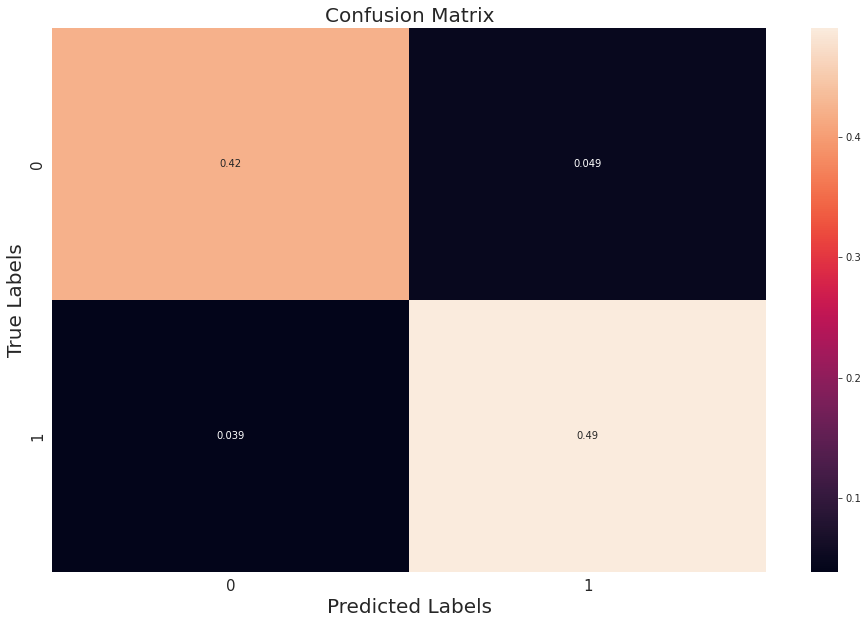

In [111]:
matrix = confusion_matrix(y_test, y_pred_RF,normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

(6) **KNN**

In [38]:
# training KNN
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, y_train)

# Predicting the test set results
y_pred_KNN = KNN.predict(X_test)

print("KNN results: \n")

accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("Accuracy: %.2f%%" % (accuracy_KNN * 100.0))

precision_KNN = precision_score(y_test, y_pred_KNN, average=None)
print("Precision: %.2f%%" % (precision_KNN[1] * 100.0))

recall_KNN = recall_score(y_test, y_pred_KNN, average=None)
print("Recall: %.2f%%" % (recall_KNN[1] * 100.0))

f1score_KNN= f1_score(y_test, y_pred_KNN, average=None)
print("F1 Score: %.2f%%" % (f1score_KNN[1] * 100.0))

KNN results: 

Accuracy: 87.99%
Precision: 88.41%
Recall: 88.96%
F1 Score: 88.69%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

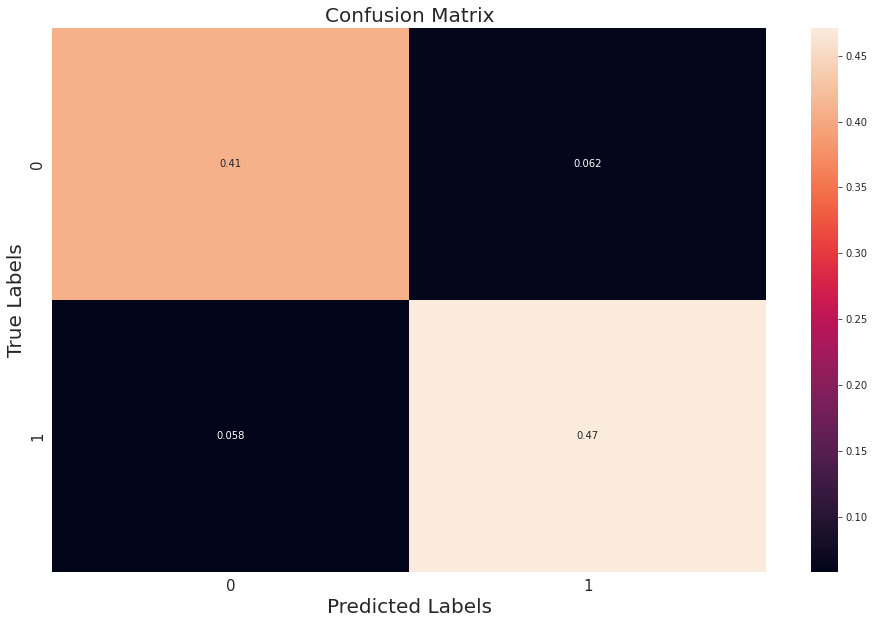

In [112]:
matrix = confusion_matrix(y_test, y_pred_KNN,normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

**(7) XG-Boost**

In [39]:
# training XG-Boost
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)

# Predicting the test set results
y_pred_xgb = xgb.predict(X_test)

print("XGB results: \n")

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

precision_xgb = precision_score(y_test, y_pred_xgb, average=None)
print("Precision: %.2f%%" % (precision_xgb[1] * 100.0))

recall_xgb = recall_score(y_test, y_pred_xgb, average=None)
print("Recall: %.2f%%" % (recall_xgb[1] * 100.0))

f1score_xgb= f1_score(y_test, y_pred_xgb, average=None)
print("F1 Score: %.2f%%" % (f1score_xgb[1] * 100.0))

XGB results: 

Accuracy: 96.43%
Precision: 97.50%
Recall: 95.71%
F1 Score: 96.59%


## **Hyper-paramter tunning of XG-Boost**

In [75]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=50, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

predict_xgb_clf = xgb_clf.predict(X_test)

print("XGB results after hyperparameter tunning: \n")

accuracy_xgb_clf = accuracy_score(y_test, predict_xgb_clf)
print("Accuracy: %.2f%%" % (accuracy_xgb_clf * 100.0))

precision_xgb_clf = precision_score(y_test, predict_xgb_clf, average=None)
print("Precision: %.2f%%" % (precision_xgb_clf[1] * 100.0))

recall_xgb_clf = recall_score(y_test, predict_xgb_clf, average=None)
print("Recall: %.2f%%" % (recall_xgb_clf[1] * 100.0))

f1score_xgb_clf= f1_score(y_test, predict_xgb_clf, average=None)
print("F1 Score: %.2f%%" % (f1score_xgb_clf[1] * 100.0))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   17.4s finished


Best paramters: {'learning_rate': 0.8880574682835564, 'max_depth': 6, 'n_estimators': 980}
XGB results after hyperparameter tunning: 

Accuracy: 98.05%
Precision: 100.00%
Recall: 96.32%
F1 Score: 98.12%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

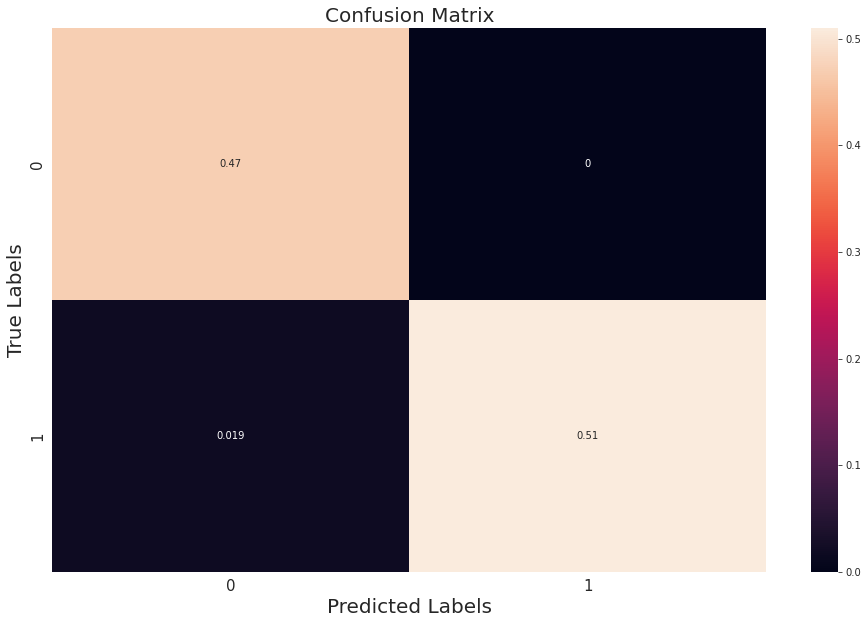

In [113]:
matrix = confusion_matrix(y_test, predict_xgb_clf,normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

## **Overall evaluation of the models**

In [78]:
models = ['Logistic Regression','Naive Bayes','Random Forest','K-Nearest Neighbour','Decision Tree','Support Vector Machine','XG-Boost']
accuracies = [accuracy_LR,accuracy_NB,accuracy_RF,accuracy_KNN,accuracy_DT,accuracy_SVM,accuracy_xgb_clf]
precisions = [precision_LR[1],precision_NB[1],precision_RF[1],precision_KNN[1],precision_DT[1],precision_SVM[1],precision_xgb_clf[1]]
recalls = [recall_LR[1],recall_NB[1],recall_RF[1],recall_KNN[1],recall_DT[1],recall_SVM[1],recall_xgb_clf[1]]
f1scores = [f1score_LR[1],f1score_NB[1],f1score_RF[1],f1score_KNN[1],f1score_DT[1],f1score_SVM[1],f1score_xgb_clf[1]]
roc_auc_scores = [roc_auc_score(y_test, y_pred_LR),roc_auc_score(y_test, y_pred_NB) , roc_auc_score(y_test, y_pred_RF) , roc_auc_score(y_test, y_pred_KNN) , roc_auc_score(y_test, y_pred_DT) , roc_auc_score(y_test, y_pred_SVM) , roc_auc_score(y_test, predict_xgb_clf) ]

In [79]:
model_ev = pd.DataFrame({
    
    'Models': models, 
    'Accuracy': accuracies ,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1scores, 
    'ROC-AUC score': roc_auc_scores
    })

model_ev

,Models,Accuracy,Precision,Recall,F1-score,ROC-AUC score
0,Logistic Regression,0.857143,0.843931,0.895706,0.869048,0.854749
1,Naive Bayes,0.811688,0.786885,0.883436,0.832370,0.807235
2,Random Forest,0.912338,0.909639,0.926380,0.917933,0.911466
3,K-Nearest Neighbour,0.879870,0.884146,0.889571,0.886850,0.879268
4,Decision Tree,0.896104,0.958042,0.840491,0.895425,0.899556
5,Support Vector Machine,0.928571,0.907514,0.963190,0.934524,0.926423
6,XG-Boost,0.980519,1.000000,0.963190,0.981250,0.981595


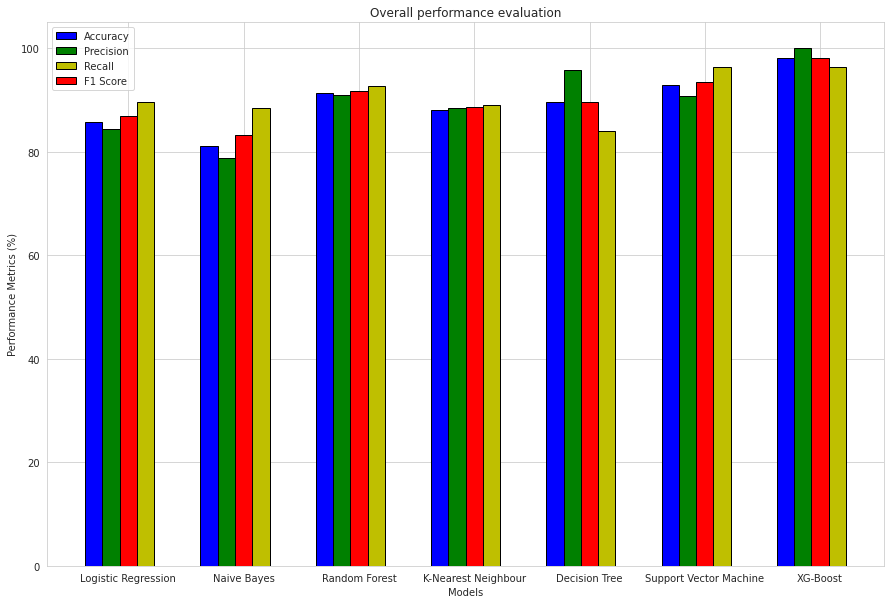

In [80]:
plt.figure(figsize=(15,10))
n= len(models)
r = np.arange(n)
width = 0.15

plt.bar(r, [i*100 for i in accuracies], color = 'b',
        width = width, edgecolor = 'black',
        label='Accuracy')
plt.bar(r + width, [i*100 for i in precisions], color = 'g',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width*3,  [i*100 for i in recalls], color = 'y',
        width = width, edgecolor = 'black',
        label='Recall')
plt.bar(r + width*2,  [i*100 for i in f1scores], color = 'r',
        width = width, edgecolor = 'black',
        label='F1 Score')

plt.xlabel("Models")
plt.ylabel("Performance Metrics (%)")
plt.title("Overall performance evaluation")

plt.xticks(r + width*2,models)
plt.legend()
  
plt.show()

## **ROC curves** of all the ML algorithms

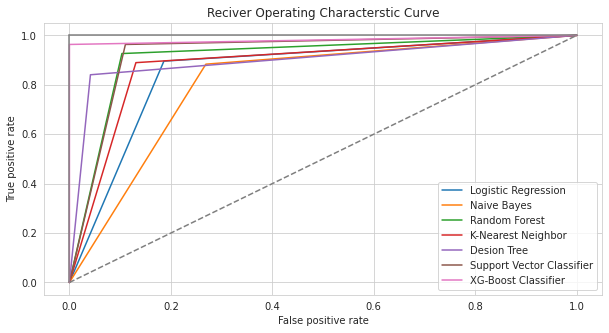

In [81]:
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,y_pred_SVM)
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,y_pred_LR)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,y_pred_NB)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,y_pred_DT)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,y_pred_RF)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,y_pred_KNN)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,predict_xgb_clf)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='XG-Boost Classifier')


plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()